<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 01:  Python and Numpy**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)
4. [Ejercicio 4.](#eje4)
5. [Ejercicio 5.](#eje5)
6. [Ejercicio 6.](#eje6)
7. [Ejercicio 7.](#eje7)


In [8]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-G1" #@param {type:"string"}
assignment_id = group_id +'.taller_python_numpy'
student_id = "2225112" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [9]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [2]:
#@title **Import libraries**

import numpy as np
import pandas as pd
np.random.seed(21)

---
# **Ejercicio 1 - Cálculo de Costo Total de Inventario**  <a name="eje1"></a>
---

## Contexto

Eres el/la administrador(a) de un centro de cómputo. Llevas un inventario con **costos unitarios** de recursos clave:

* `"Monitores"`
* `"Teclados"`
* `"Discos Duros"`
* `"Licencias de Software"`

Estos costos vienen en un **diccionario** donde las claves son exactamente los nombres anteriores y los valores son números (enteros o flotantes) en pesos colombianos.

## Tu tarea

Implementa la función **`taller01_20252_p01(inventario)`** que:

1. Verifique que el diccionario **contenga exactamente** las cuatro claves esperadas (sin faltantes ni extras).
2. Verifique que **todos los valores** asociados sean **numéricos** (solo `int` o `float`).
3. Si todo es válido, **devuelva la suma** de los costos.
4. En cualquier otro caso (diccionario vacío, claves faltantes o adicionales, o valores no numéricos), **devuelva `0`**.

## Formato de entrada y salida

* **Entrada:** un diccionario como `{"Monitores": 200.50, "Teclados": 50.00, "Discos Duros": 120.75, "Licencias de Software": 300.00}`
* **Salida:** un número con el costo total si la validación pasa; `0` si falla.

## Casos de ejemplo

* ✅ Entrada válida
  `{"Monitores": 200.50, "Teclados": 50.00, "Discos Duros": 120.75, "Licencias de Software": 300.00}`
  **Salida:** `671.25`  (200.50 + 50.00 + 120.75 + 300.00)

* ❌ Falta una clave
  `{"Monitores": 200.50, "Teclados": 50.00, "Discos Duros": 120.75}`
  **Salida:** `0`

* ❌ Diccionario vacío
  `{}`
  **Salida:** `0`

* ❌ Clave no esperada
  `{"Monitores": 200.50, "Teclados": 50.00, "Discos Duros": 120.75, "Licencias de Software": 300.00, "Mouses": 20.00}`
  **Salida:** `0`

* ❌ Valor no numérico
  `{"Monitores": 200.50, "Teclados": "50.00", "Discos Duros": 120.75, "Licencias de Software": 300.00}`
  **Salida:** `0`

> **Nota:** Las claves deben coincidir **exactamente** (incluyendo mayúsculas y espacios). Los valores deben ser estrictamente `int` o `float` (no cadenas con números).

In [1]:
#@title **code student**

def taller01_20252_p01(inventario):
    
    suma = 0
    i=0
    recursos_esperados = {"Monitores", "Teclados", "Discos Duros", "Licencias de Software"}
    for key in inventario:
        if key not in recursos_esperados:
            print("el elemento", key, "no es válido")
            return 0
        if i > 4:
            print("demasiados elementos")
            return 0
        if not isinstance(inventario[key], (int, float)):
            print("el elemento", inventario[key], "no es un tipo válido")
            return 0
        suma += inventario[key]
        i+=1
    if i < 4:
        print("elementos faltantes")
        return 0
    return suma

In [3]:
#@title **check your answer**
print(taller01_20252_p01({}))

elementos faltantes
0


In [6]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p01)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent, you got the highest score.
Status
	You have achieved your best score: 5.0


---
# **Ejercicio 2**  <a name="eje2"></a>
---

## Contexto
Dada la siguiente lista anidada:

<pre>
mylist = [
["h", "m", " "],
["o", "u", "2"],
["l", "n", "0"],
["a", "d", "2"],
[" ", "o", "5"],
]</pre>

## Tu tarea

Implementa la función **`taller01_20252_p02(mylist)`** que:

1. Recorra cada columna de la lista anidada para encontrar, de forma consecutiva, los caracteres de la cadena buscada.
2. Usted deberá iterar/recorrer la lista anidada sobre sus filas y columnas como le parezca conveniente.
3. Al final, **retorne** una cadena que muestre el mensaje **que se encuentra codificado**.

## Formato de entrada y salida

* **Entrada:** una lista anidada `mylist`
* **Salida:** una cadena con el mensaje que se encuentra codificado.

## Casos de ejemplo

* ✅ **Entrada:**
  <pre>mylist = [
        ["h", "m", " "],
        ["o", "u", "2"],
        ["l", "n", "0"],
        ["a", "d", "2"],
        [" ", "o", "5"],
  ]</pre>
  **Salida:** `hola mundo 2025`

* ❌ **Entrada:**
  <pre>mylist = [
        ["h", "m", " "],
        ["o", "u", "2"],
        ["l", "n", "0"],
        ["a", "d", "2"],
        [" ", "o", "5"],
  ]</pre>
  **Salida:** `hm ou2ln0ad2 o5`


In [4]:
#@title **code student**

def taller01_20252_p02(mylist):
	cadena = ""
	

	for i in range(len(mylist[0])):
		for j in range(len(mylist)):
			cadena += mylist[j][i]
		

	return cadena

In [6]:
#@title **check your answer**

mylist = [
        ["h", "m", " "],
        ["o", "u", "2"],
        ["l", "n", "0"],
        ["a", "d", "2"],
        [" ", "o", "5"],
]

print(taller01_20252_p02(mylist))

hola mundo 2025


In [10]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p02)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Perfect, the message is correct.
Status
	You have achieved your best score: 5


---
# **Ejercicio 3: ONE-HOT-ENCODING**  <a name="eje3"></a>
---

En inteligencia artificial, para procesar las categorias de los datos, es importante definirles un **código** para que el computador las interprete.

Una **codificación** muy utilizada es el *one-hot-encoding* que primero le asigna un número a la categoria (datos categoricos: 1, 2, ...) y luego cada número lo codifica en un arreglo, con un uno, en el indice de la categoria y lo demás es cero. El tamaño del arreglo depende del número de categorias. Mira el siguiente ejemplo:  

![one-hot-encoding.png](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/one-hot-encoding.png)

🚨 **Reto**

Crear una función que, dado un array unidimensional de valores categóricos (`arr`), retorne su representación en one-hot encoding, donde cada valor único en el arreglo original se convierte en un vector binario que indica la presencia o ausencia de ese valor en el arreglo original.
- Obtenga los valores únicos del array `arr`
- Reserve espacio para el resultado final
- Haga las asignaciones de 1 y 0 de la forma que corresponde
- **DEVUELVA** el array que contiene la codificación one-hot encoding.

In [29]:
#@title **code student**
def taller01_20252_p03(arr):
	import numpy as np
	a, indice = np.unique(arr, return_inverse=True)
	t =np.diag(np.ones(len(a)))
	r = np.zeros((len(arr), len(a)))

	for i, element in enumerate(indice):
		r[i,:] = t[element,:]
	return r

In [30]:
#@title **check your answer**
import numpy as np
data = np.array([16, 71, 98, 16, 66, 71]) #[ 1,3,4,1,2,3]
taller01_20252_p03(data)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [31]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p03)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent. you got the highest score.
Status
	You have achieved your best score: 5.0


---
# **Ejercicio 4:** La importancia de la normalización <a name="eje4"></a> 📏
---

## **Contexto:**

En aprendizaje de máquina, un preprocesamiento crucial de los datos es la normalización de los mismos. Con esto prevenimos que valores que presentan intervalos amplios (el costo de una casa, por ejemplo) sean dominantes durante el proceso de aprendizaje respecto a valores de intervalos cortos (como el número de habitaciones, por ejemplo). Por otra parte, este proceso favorece la velocidad y estabilidad del aprendizaje permitiendo la convergencia del modelo.

## ⛳ **Reto:**
Imagina que tienes un conjunto de mediciones aleatorias (por ejemplo, el tiempo que 10 personas seleccionadas al azar tardaron en resolver un rompecabezas). Crea una función `taller01_20252_p0`, dentro de la cual se haga lo siguiente:


* Cree un **arreglo 1D** llamado `data` con **10 números flotantes aleatorios** entre 0 y 100.  
* Calcule la **media (mean)** y la **desviación estándar (std)** de `data`.  
* Aplique la fórmula de **normalización Z-score** a `data` para crear un nuevo arreglo `normalized_data`.  
* Retorne el arreglo `normalized_data`.  

**La fórmula es:**

$$
z = \frac{x - \text{mean}}{\text{std}}
$$

In [32]:
#@title **code student**
def taller01_20252_p04(seed=21):
	import numpy as np
	np.random.seed(seed)
	data = np.random.uniform(0,100, size=10)
	mean = data.mean()
	std = data.std()
	normalized_data = (data - mean) / std

	return normalized_data

In [33]:
#@title **check your answer**

print("Normalized vector:")
print(taller01_20252_p04())


Normalized vector:
[-1.10723071 -0.12426998  1.6416412  -1.21808099 -0.46443066 -1.09885467
 -0.0704481   1.4083325  -0.04655746  1.07989889]


In [34]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p04)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent. You got the highest score.
Status
	You have achieved your best score: 5.0


---
# **Ejercicio 5**  <a name="eje5"></a>
---

## Contexto

Dispones de un arreglo 3D de NumPy de tamaño **50×50×50** que contiene una **esfera** de radio **20** centrada en el volumen.

* Los vóxeles que pertenecen a la esfera tienen valor **1**.
* El resto tienen valor **0**.
  Es, por tanto, un **arreglo binario**.

## Tu tarea

Implementa la función **`taller01_20252_p05(sphere, count_threshold)`** que:

1. **Recorra la dimensión Z** (el tercer eje) del arreglo `sphere`.
2. **Cuente**, para cada corte $z$, cuántos píxeles **activos** (valor `1`) hay en ese corte.
3. **Seleccione** únicamente los cortes donde ese conteo sea **estrictamente mayor** que `count_threshold`.
4. **Devuelva** un **subarreglo** con los cortes seleccionados, **manteniendo el orden** original en Z. El resultado debe tener forma `(50, 50, N)`, donde `N` es el número de cortes que superan el umbral. Si **ningún** corte lo supera, devuelve un `None`.

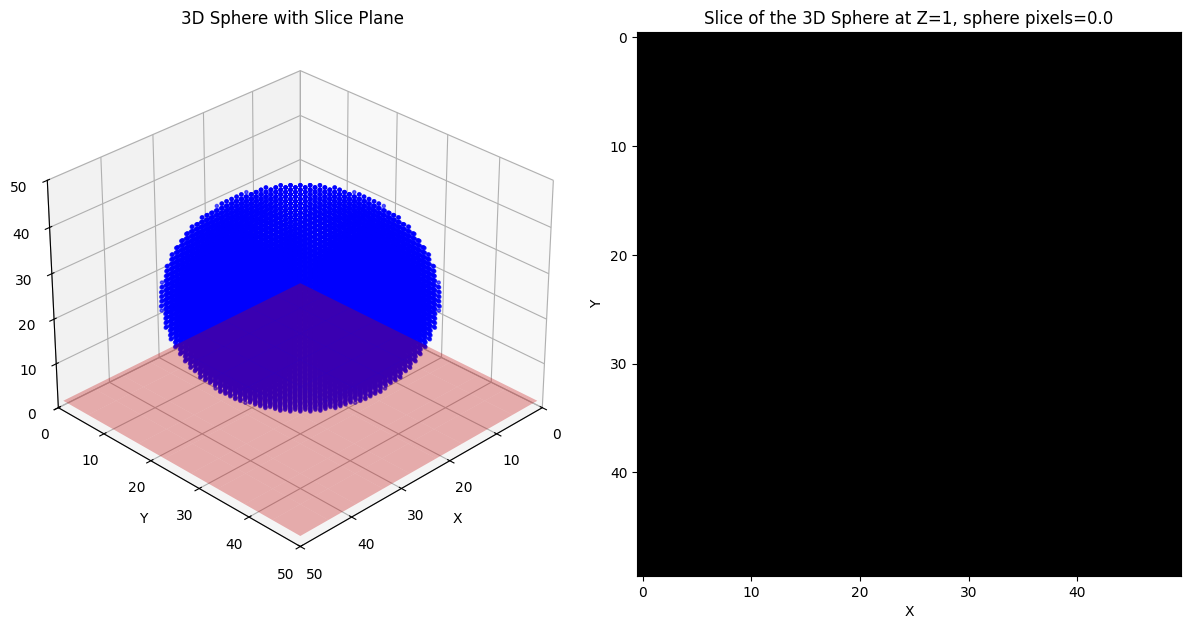

In [35]:
#@title Exploración de los cortes en Z de la esfera

def get_sphere():

    # Define the dimensions of the 3D array
    shape = (50, 50, 50)

    # Create a 3D array of zeros
    sphere = np.zeros(shape)

    # Define the center and radius of the sphere
    center = (shape[0] // 2, shape[1] // 2, shape[2] // 2)
    radius = 20

    # Iterate through the array and set values to 1 for points inside the sphere
    for i in range(shape[0]):
        for j in range(shape[1]):
            for k in range(shape[2]):
                # Calculate the distance from the center
                distance = np.sqrt((i - center[0])**2 + (j - center[1])**2 + (k - center[2])**2)
                # If the distance is less than or equal to the radius, set the value to 1
                if distance <= radius:
                    sphere[i, j, k] = 1

    return sphere


def plot_sphere_with_slice_plane(sphere, z_plane):

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np

    fig = plt.figure(figsize=(12, 6)) # Increase figure size to accommodate two subplots

    # Left subplot for 3D sphere with plane
    ax1 = fig.add_subplot(121, projection='3d') # 1 row, 2 columns, first plot

    # Get the coordinates of the points inside the sphere
    x, y, z = np.where(sphere == 1)

    # Plot the points with smaller marker size and transparency
    ax1.scatter(x, y, z, c='blue', marker='o', s=5, alpha=0.6)

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('3D Sphere with Slice Plane')
    ax1.set_xlim(0, 50)
    ax1.set_ylim(0, 50)
    ax1.set_zlim(0, 50)

    # Adjust viewpoint
    ax1.view_init(elev=30, azim=45)

    # Draw the plane at z=24
    x_plane = np.linspace(0, sphere.shape[0]-1, 10)
    y_plane = np.linspace(0, sphere.shape[1]-1, 10)
    X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
    Z_plane = np.full_like(X_plane, z_plane)

    ax1.plot_surface(X_plane, Y_plane, Z_plane, color='red', alpha=0.3) # Add a transparent red plane

    # Right subplot for the 2D slice
    ax2 = fig.add_subplot(122) # 1 row, 2 columns, second plot

    # Display a slice of the sphere at z=24
    slice_z24 = sphere[:, :, z_plane]
    ax2.imshow(slice_z24, cmap='gray')
    ax2.set_title(f"Slice of the 3D Sphere at Z={z_plane}, sphere pixels={np.sum(slice_z24)}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')


    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show()

z_index = 1 # @param {"type":"slider","min":0,"max":49,"step":1}
sphere = get_sphere()
plot_sphere_with_slice_plane(sphere, z_index)

In [36]:
def taller01_20252_p05(sphere, count_threshold):
    import numpy as np
    selected_slices = []

    for i in range(sphere.shape[2]):
        slice_z = sphere[:, :, i]
        if np.sum(slice_z) > count_threshold:
            selected_slices.append(i)


    if len(selected_slices) == 0:
        return None

    filtered_sphere = sphere[:,:,selected_slices]
    return filtered_sphere


Filtered sphere shape: (50, 50, 17)


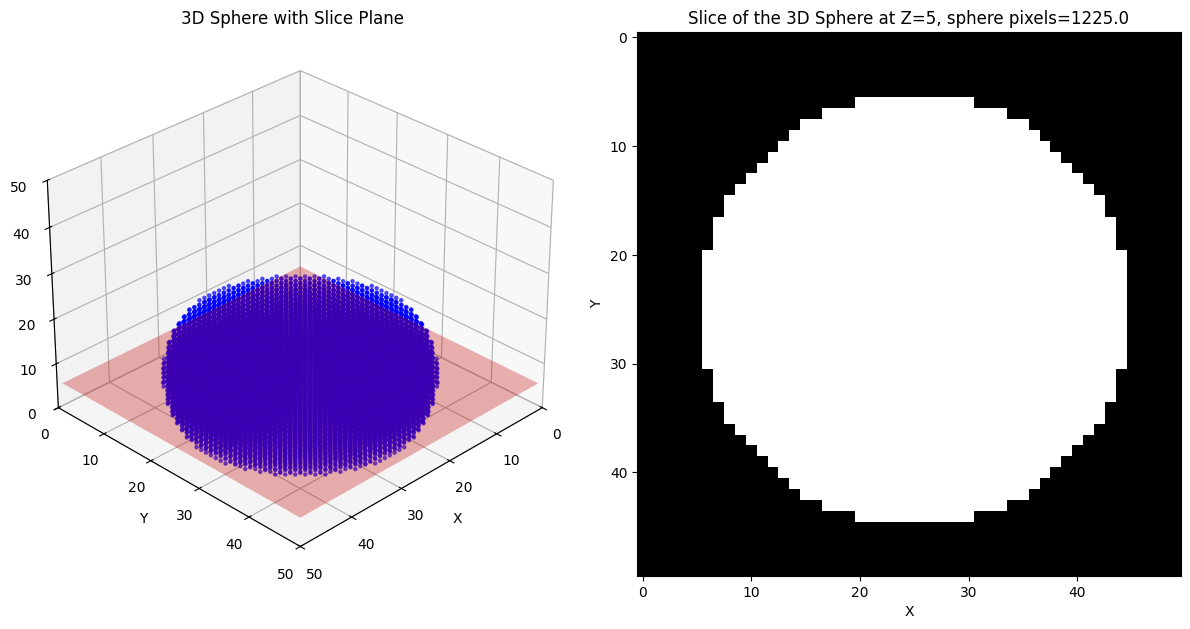

In [37]:
#@title **check your answer**
filtered_sphere = taller01_20252_p05(sphere, count_threshold=1000)
if filtered_sphere is None:
    print("No slices exceeded the count threshold.")
else:
    print(f"Filtered sphere shape: {filtered_sphere.shape}")
    plot_sphere_with_slice_plane(filtered_sphere, 5)

In [38]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p05)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent. you got the highest score.
Status
	You have achieved your best score: 5.0


---
# **Ejercicio 6**  <a name="eje6"></a>
---

## Contexto

En visión por computador y preprocesamiento de datos es común trabajar con **máscaras binarias** (0/1) que indican presencia/ausencia, fondo/objeto, etc. Antes de usar una máscara, conviene **validar** que realmente solo contenga **0s y 1s**.

## Tu Tarea

Implementa una función **`taller01_20252_p06(arr)`** que determine si un arreglo de NumPy es **binario**, es decir, si **todos** sus elementos pertenecen al conjunto `{0, 1}`. Requisitos:

* Acepta arreglos de **cualquier forma** y de los siguientes dtypes: enteros, flotantes y booleanos.
* Considera `True` y `False` como binarios (equivalentes a `1` y `0`).
* Si aparece **cualquier otro valor** (p. ej., `2`, `-1`, `0.5`, `np.nan`, `np.inf`), el resultado debe ser **`False`**.
* Convención para casos límite: un arreglo **vacío** se considera **binario** (no incumple la condición).

## 🧪 Ejemplos

* `arr = np.array([0, 1, 1, 0])` → `True`
* `arr = np.array([[0., 1.], [1., 0.]])` → `True`
* `arr = np.array([True, False, True])` → `True`
* `arr = np.array([0, 2, 1])` → `False`
* `arr = np.array([0.0, 1.0, 0.5])` → `False`

In [39]:
#@title **code student**
def taller01_20252_p06(arr):
    import numpy as np
    r = np.all((arr == 1) | (arr == 0))
    # r = np.any((arr !== 1 && arr !=0))

    return r


In [40]:
#@title **check your answer**

print(taller01_20252_p06(np.array([0, 1, 1, 0]))) # Expected value: True
print(taller01_20252_p06(np.array([[0., 1.], [1., 0.]]))) # Expected value: True
print(taller01_20252_p06(np.array([True, False, True]))) # Expected value: True
print(taller01_20252_p06(np.array([0, 2, 1]))) # Expected value: False
print(taller01_20252_p06(np.array([0.0, 1.0, 0.5]))) # Expected value: False

True
True
True
False
False


In [41]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p06)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent. you got the highest score.
Status
	You have achieved your best score: 5.0


---
# **Ejercicio 7**  <a name="eje7"></a>
---

## Contexto

En preprocesamiento de datos es común encontrar valores faltantes (`NaN`). Una estrategia simple y eficaz es **imputar por columna** usando la **media** calculada con los datos disponibles (ignorando `NaN`).

## Tu Tarea

Implementa la función **`taller01_20252_p07(X)`** que, dado un arreglo **2D** `X` de forma `(N, D)`, devuelva una **nueva matriz** donde cada `NaN` haya sido reemplazado por la **media de su columna**, calculada **ignorando `NaN`**.
Si una columna contiene **solo `NaN`**, entonces **todas sus posiciones deben permanecer `NaN`** (no existe media válida).

**Formato de Entrada/Salida:**

* **Entrada:** `X` — `np.ndarray` 2D con posibles `NaN`.
* **Salida:** `np.ndarray` 2D de la **misma forma** que `X`, con `NaN` imputados por media de columna (o `NaN` si la columna es toda `NaN`).

## 🧪 Ejemplo (conceptual)

Entrada

```
[[np.nan, 1.]
[np.nan, 3.]
[1, np.nan]]
```

Salida

```
[[1. 1.]
 [1. 3.]
 [1. 2.]]
```

In [44]:
#@title **code student**

def taller01_20252_p07(X):

    import numpy as np
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if np.isnan(X[i,j]):
                X[i,j] = np.nanmean(X[:,j])

    return X


In [45]:
#@title **check your answer**
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

X = np.array([[1.,   np.nan, 3.],
              [np.nan, 5.,   6. ]])
print(taller01_20252_p07(X))
# Esperado:
# [[1.  5.  3.]
#  [1.  5.  6.]]

X2 = np.array([[np.nan, 1.],
               [np.nan, 3.],
               [1, np.nan]])
print(taller01_20252_p07(X2))
# Esperado:
# [[1. 1.]
#  [1. 3.]
#  [1. 2.]]

X3 = np.array([[np.nan,  1.],
               [np.nan, 3.]])
print(taller01_20252_p07(X3))
# Esperado: primera columna sigue NaN (sin media); segunda intacta
# [[nan  1.]
#  [nan  3.]]

[[1. 5. 3.]
 [1. 5. 6.]]
[[1. 1.]
 [1. 3.]
 [1. 2.]]
[[nan  1.]
 [nan  3.]]


In [46]:
#@title **send your answer**
student_func_str = inspect.getsource(taller01_20252_p07)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5.0
Message
	Excellent. you got the highest score.
Status
	You have achieved your best score: 5.0


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>